#### 결정 트리 알고리즘 기반 모델
- 데이터셋의 피처(특성)를 기준으로 데이터를 분류하는 알고리즘
- 질문방식으로 Yes/No 결과에 따라 데이터셋 분리가 됨
- 장점 : 스케일링이나 정규화 불필요 ==> 성능에 영향을 미치지 않음 / 쉬운 알고리즘
- 단점 : 과대적합 ===> 해결을 위한 많은 하이퍼파라미터 존재
- 다른 머신러닝 알고리즘에 비해 성능이 좋지 않음 ==> 단, 여러개의 DT가 모이면 성능이 강해짐
    * 앙상블에 주로 사용됨!

[1] 모듈 로딩 및 데이터 준비

In [35]:
# 모듈 로딩
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [36]:
# 데이터 로딩
featureDF, targetSR = load_iris(as_frame=True, return_X_y=True)

print(f'featureDF : {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR : {targetSR.shape}, {targetSR.ndim}D')

featureDF : (150, 4), 2D
targetSR : (150,), 1D


[2] 학습용 데이터셋 준비

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [38]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, random_state=10, stratify=targetSR)

In [39]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D    X_test : {X_test.shape}, {X_test.ndim}D')

print(f'y_train : {y_train.shape}, {y_train.ndim}D      y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (112, 4), 2D    X_test : (38, 4), 2D
y_train : (112,), 1D      y_test : (38,), 1D


[3] 학습 - 기본 학습

In [40]:
# 모델 인스턴스 생성
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [41]:
# 모델 파라미터 : 학습fit() 후에 학습용 데이터셋을 기반으로 설정된 값들
print(f'[dt_model.classes_] {dt_model.classes_}')
print(f'[dt_model.n_classes_] {dt_model.n_classes_}개')
print(f'[dt_model.max_features_] {dt_model.max_features_}개')
print(f'[dt_model.features_name_in_] {dt_model.feature_names_in_}')
print(f'[dt_model.feature_importances_] {dt_model.feature_importances_}')

[dt_model.classes_] [0 1 2]
[dt_model.n_classes_] 3개
[dt_model.max_features_] 4개
[dt_model.features_name_in_] ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
[dt_model.feature_importances_] [0.03125249 0.         0.06844775 0.90029976]


[4] 성능 평가

In [42]:
# 학습용 데이터셋에 대한 성능
train_score = dt_model.score(X_train, y_train)

# 테스트용 데이터셋에 대한 성능
test_score = dt_model.score(X_test, y_test)

In [43]:
print(f'train_score:test_score = {train_score}: {test_score}')

train_score:test_score = 1.0: 1.0


[5] 교차검증 => 데이터셋 부족 해결 및 과대적합을 회피

In [44]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [45]:
# 교차검증 준비 ==> 모델 인스턴스, trainDS, cv=5[기본]
dt_model2 = DecisionTreeClassifier(random_state=1)
result = cross_validate(dt_model2, X_train, y_train, return_train_score=True, return_estimator=True)

In [46]:
# dict => DataFrame
resultDF = pd.DataFrame(result)

In [47]:
resultDF

,fit_time,score_time,estimator,test_score,train_score
0,0.003995,0.002001,DecisionTreeClassifier(random_state=1),0.956522,1.0
1,0.003112,0.003025,DecisionTreeClassifier(random_state=1),0.956522,1.0
2,0.002986,0.002002,DecisionTreeClassifier(random_state=1),0.954545,1.0
3,0.003020,0.000998,DecisionTreeClassifier(random_state=1),0.863636,1.0
4,0.002026,0.000999,DecisionTreeClassifier(random_state=1),0.909091,1.0


[6] 성능 향상을 위한 튜닝 ==> 하이퍼파라미터 설정
- Decision Tree 단점 : 과대적합
    * max_depth, mean_samples_leaf, min_impurity_decrease, ... => 많음

In [48]:
from sklearn.model_selection import GridSearchCV

In [60]:
# 하이퍼파라미터 dict 생성
params={'max_depth':[8,6,4], 'min_samples_leaf':[7,6,5]}

In [61]:
gscv = GridSearchCV(DecisionTreeClassifier(), param_grid=params, refit=True, return_train_score=True)
gscv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 6, 4], 'min_samples_leaf': [7, 6, 5]},
             return_train_score=True)

In [62]:
# 모델 파라미터 확인
print(f'[gscv.best_params_] {gscv.best_params_}')
print(f'[gscv.best_score_] {gscv.best_score_}')
print(f'[gscv.best_estimator_] {gscv.best_estimator_}')
# print(f'[gscv.cv_results_] \n{gscv.cv_results_}')

cv_resultDF = pd.DataFrame(gscv.cv_results_)

[gscv.best_params_] {'max_depth': 8, 'min_samples_leaf': 7}
[gscv.best_score_] 0.9284584980237154
[gscv.best_estimator_] DecisionTreeClassifier(max_depth=8, min_samples_leaf=7)


In [63]:
cv_resultDF.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [64]:
result_scoreDF = cv_resultDF[['mean_train_score', 'mean_test_score']].copy()
result_scoreDF['diff'] = cv_resultDF['mean_train_score']-cv_resultDF['mean_test_score']
result_scoreDF

,mean_train_score,mean_test_score,diff
0,0.950886,0.928458,0.022428
1,0.955331,0.919368,0.035963
2,0.957553,0.928458,0.029095
3,0.950886,0.928458,0.022428
4,0.950886,0.919368,0.031519
5,0.953109,0.928458,0.024650
6,0.950886,0.928458,0.022428
7,0.950886,0.919368,0.031519
8,0.957553,0.928458,0.029095


- 주요 피처 시각화

In [65]:
## 가장 좋은 모델
best_model = gscv.best_estimator_
print(f'[best_model.max_depth] {best_model.max_depth}')
print(f'[best_model.min_samples_leaf] {best_model.min_samples_leaf}')

[best_model.max_depth] 8
[best_model.min_samples_leaf] 7


In [66]:
# 피처 중요도 및 개수
best_model.feature_importances_, best_model.n_features_in_

(array([0.00669645, 0.        , 0.60241733, 0.39088622]), 4)

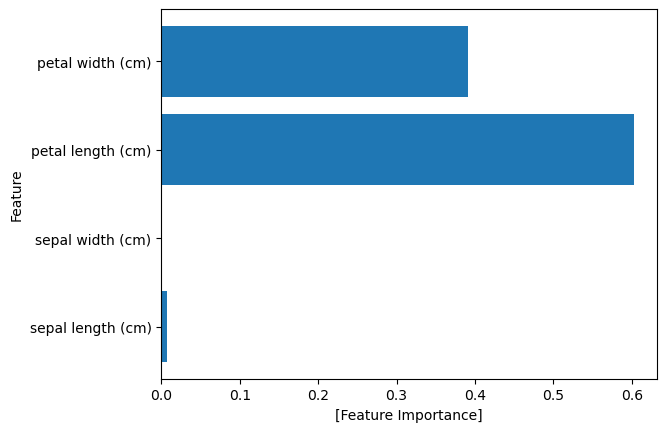

In [67]:
import matplotlib.pyplot as plt

plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel('[Feature Importance]')
plt.ylabel('Feature')
plt.show()

- Decision Tree 시각화
    * Graphviz 프로그램(OS에 맞는 버전) 설치 + python 용 패키지 graphviz 설치

In [68]:
best_model.classes_, targetSR.unique(), best_model.feature_names_in_,

(array([0, 1, 2]),
 array([0, 1, 2]),
 array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)'], dtype=object))

In [69]:
## DT모델을 dot포맷의 파일로 저장 ==> export_graphxiz()
from sklearn.tree import export_graphviz

export_graphviz(best_model, out_file='tree.dot', class_names=['setosa', 'versicolor', 'virginica'], 
                feature_names=best_model.feature_names_in_, impurity=True, filled=True, rounded=True)

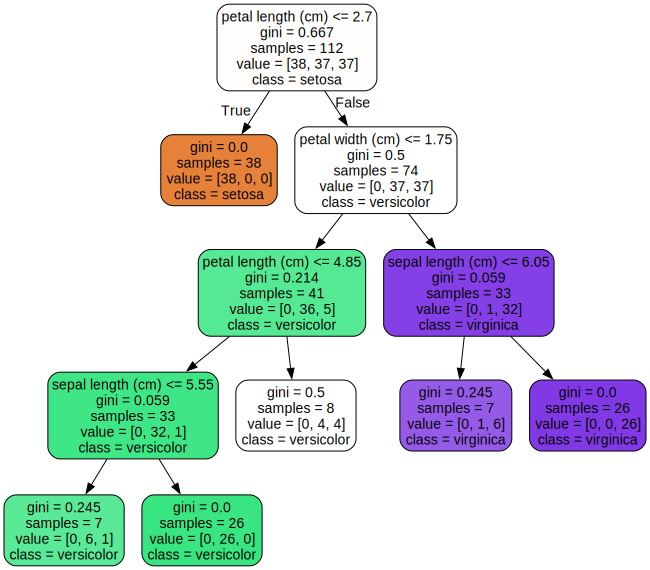

In [59]:
## (2) dot 파일 출력
import graphviz

# 파일에서 데이터 읽어오기
with open('tree.dot')as f:
    dot_data = f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

[7] 새로운 데이터 예측

In [70]:
new_data = featureDF.iloc[:1]+0.21
best_model.predict(new_data)

array([0])

In [71]:
best_model.predict_proba(new_data)

array([[1., 0., 0.]])